In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
import xgboost as xgb
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
df_churn = pd.read_csv('df_churn_transformed.csv')
df_churn.drop("Unnamed: 0",axis=1,inplace=True)

In [3]:
df_churn.dtypes

CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Geography_France     float64
Geography_Germany    float64
Geography_Spain      float64
Gender_Female        float64
Gender_Male          float64
Exited                 int64
dtype: object

In [4]:
x_train,x_test,y_train,y_test = train_test_split(df_churn.iloc[:,~df_churn.columns.isin(['Exited'])],df_churn[['Exited']],test_size=0.2,random_state=0)

## classification par XGBoost

In [5]:
x_train_1=x_train
y_train_1=y_train
x_test_1=x_test
y_test_1=y_test

In [6]:

model = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    n_estimators=100,
    objective='binary:logistic',
    subsample=0.8,
    colsample_bytree=0.8,
    seed=42
)
model.fit(x_train_1, y_train_1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [7]:
y_pred_1 = model.predict(x_test_1)

In [8]:
class classif_result(object):
    def __init__(self,y_test,y_pred_test):
        
        self.y_true = y_test
        self.y_pred = y_pred_test
        
    def cm(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        print(cm)
        cm_matrix = pd.DataFrame(data=cm, columns=['Vrai Positive:1', 'Vraie Negative:0'], 
                                 index=['Estimation Positive:1', 'Estimation Negative:0'])

        sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
        plt.show()
        print(">> resultat de la classification:")
        print(classification_report(self.y_true, self.y_pred))
        TP = cm[0,0]
        TN = cm[1,1]
        FP = cm[0,1]
        FN = cm[1,0]
        classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
        print('Justesse de la Classification (accuracy) : {0:0.4f}'.format(classification_accuracy))
        classification_error = (FP + FN) / float(TP + TN + FP + FN)
        print('Erreurs de Classification : {0:0.4f}'.format(classification_error))
        recall = TP / float(TP + FN)
        print('Recall ou Sensitivity : {0:0.4f}'.format(recall))
        print("taux de faux positive:")
        false_positive_rate = FP / float(FP + TN)
        print(false_positive_rate)
        print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
        specificity = TN / (TN + FP)
        print('Specificity : {0:0.4f}'.format(specificity))
        

[[1513   82]
 [ 193  212]]


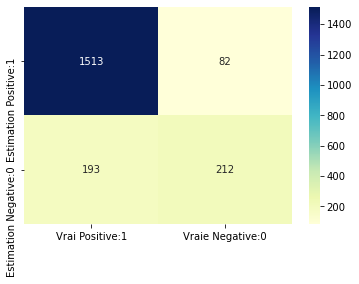

>> resultat de la classification:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.72      0.52      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

Justesse de la Classification (accuracy) : 0.8625
Erreurs de Classification : 0.1375
Recall ou Sensitivity : 0.8869
taux de faux positive:
0.2789115646258503
False Positive Rate : 0.2789
Specificity : 0.7211


In [9]:
i_res_xgb = classif_result(y_test_1,y_pred_1)
i_res_xgb.cm()

In [10]:
param_grid = {
'max_depth':list(range(2,6,1)) ,
'learning_rate':[0.2,0.1,0.01,0.001],
'n_estimators':[50,100,300,400],
'reg_lambda':[0.5,0.1]
}

In [11]:
model = xgb.XGBClassifier()
grid_search = GridSearchCV(model,param_grid,cv=8,scoring='accuracy',n_jobs=-1)
grid_search.fit(x_train_1,y_train_1)

GridSearchCV(cv=8,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 300, 400],
                         'reg_lambda': [0.5, 0.1]},
             scoring='accuracy')

In [12]:
# Meilleurs hyperparametres trouvees:

In [13]:
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 0.5}

In [14]:
y_pred_1_train = grid_search.predict(x_train_1)
accuracy_gds_train = accuracy_score(y_train_1,y_pred_1_train)
accuracy_gds_train

0.871625

In [15]:
y_pred_2 = grid_search.predict(x_test_1)
accuray_gds = accuracy_score(y_test_1,y_pred_2)
accuray_gds

0.865

In [16]:
best_xgb =  xgb.XGBClassifier(
    learning_rate=0.2,
    max_depth=3,
    n_estimators=50,
    objective='binary:logistic',
    reg_lambda=0.8,
    seed=42
)
best_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [17]:
# Calculer les prédictions pour les jeux d'entraînement et de test
train_predictions = best_xgb.predict(x_train)
test_predictions = best_xgb.predict(x_test)

# Calculer l'erreur de validation
validation_error = np.mean(np.abs(train_predictions - y_train.values))

# Calculer l'erreur de test
test_error = np.mean(np.abs(test_predictions - y_test.values))

# Calculer le rapport entre l'erreur de validation et l'erreur de test
overfitting_ratio = validation_error / test_error

In [18]:
overfitting_ratio

0.9665531870318965

## Classification, Adaboost choice:

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [20]:
param_grid ={
        'n_estimators':[100,300,500],
        'bestimator':[
                        DecisionTreeClassifier(max_depth=1),
                        DecisionTreeClassifier(max_depth=2),
                        SVC(kernel='linear',C=0.5),
                        LogisticRegression(solver='lbfgs')
        ],
        
        'learning_rate':[0.1,0.01,0.01],
        'random_state':[42],
        'algorithm':['SAMME','SAMME.R']
    
    
    
    
}

In [21]:
param_grid ={
        'n_estimators':[100],
        'estimator':[
                        DecisionTreeClassifier(max_depth=1),
                        DecisionTreeClassifier(max_depth=2),
                        SVC(kernel='linear',C=0.5),
                        LogisticRegression(solver='lbfgs')
        ],
        
        'learning_rate':[0.1,0.01],
        'random_state':[42],
        'algorithm':['SAMME','SAMME.R']
    
    
    
    
}

In [22]:
grid_s = GridSearchCV(AdaBoostClassifier(),param_grid,cv=5)

In [ ]:
grid_s.fit(x_train.to_numpy(),y_train.values.ravel())
y_pred = grid_s.predict(x_test.values)

In [ ]:
y_pred

In [ ]:
accuracy_ada = accuracy_score(y_test,y_pred)
accuracy_ada

In [ ]:
grid_s.best_estimator_

In [ ]:
y_pred_bmd = grid_s.best_estimator_.predict(x_test.values)

In [ ]:
y_pred_bmd

In [ ]:
accuracy_bmd = accuracy_score(y_test,y_pred_bmd)
accuracy_bmd

In [ ]:
cv_ada_res = pd.DataFrame(grid_s.cv_results_)
cv_ada_res.dtypes

In [ ]:
df_ada_res = cv_ada_res[["mean_fit_time",'params', 'mean_test_score', 'std_test_score']]
df_ada_res.sort_values(by=['mean_test_score'],ascending=False,inplace=True)
df_ada_res.head(10)

## Classification, RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialisation du classifieur
rfc = RandomForestClassifier()

# Définition des hyperparamètres à optimiser
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10,15],
    'min_samples_split': [5,10, 15, 20],
    'criterion':["gini","entropy","log_loss"],
    'max_features':["sqrt","log2"]
}

# Initialisation du GridSearchCV
grid_rfc = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit du GridSearchCV sur les données d'entraînement
grid_rfc.fit(x_train.to_numpy(), y_train.values.ravel())

# Affichage des performances de chaque modèle dans le GridSearchCV
cv_results = grid_rfc.cv_results_

In [ ]:
cv_rdf_results = pd.DataFrame(cv_results)
df_res_rdf = cv_rdf_results[["mean_fit_time",'params', 'mean_test_score', 'std_test_score']]
df_res_rdf.head(10)

In [ ]:
df_res_rdf.sort_values(by=['mean_test_score'],inplace=True,ascending=False)
df_res_rdf.head(10)

In [ ]:
grid_rfc.best_estimator_

In [ ]:
y_pred_best_rdf =grid_rfc.best_estimator_.predict(x_test.values)

In [ ]:
acc_rdf = accuracy_score(y_test,y_pred_best_rdf)
acc_rdf

## comparaisons des modeles

In [ ]:
def plot_roc_curves(models, X_train, y_train, X_test, y_test):
    
    #dans le cas ou on veut reentrainer les modeles pour la comparaison
    plt.figure(figsize=(8, 8))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title('Courbes ROC pour plusieurs modèles')

    for i, model in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label='Modèle %d (AUC = %0.2f)' % (i+1, roc_auc))

    plt.legend(loc="lower right")
    plt.show()

In [ ]:
l_models= [grid_rfc.best_estimator_,grid_s.best_estimator_,best_xgb]
plot_roc_curves(l_models, x_train, y_train, x_test, y_test)

In [ ]:
## dans le cas ou on veux partir sur les modeles deja entrainés:

In [ ]:
from sklearn.externals import joblib
